## Graph Point Extractor Using Computer Vision


Step 0 - Ensure the following libraries have been installed 


- numpy
- matplotlib
- opencv-python
- extcolors

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import extcolors

Step 1 - Load the Image of the Document

In [2]:
documentName = "sampleImages"+"/whiteSample.JPG"
img = cv2.imread(documentName)


Step 2 - Select the Most Populus Color in the Image
- Filter out the background color
- Select colors that are are the lines of the graph

In [3]:
colors_x = extcolors.extract_from_path(documentName, tolerance = 12, limit = 12)
colorsDist = colors_x[0]

max = 0          # background color count
maxColor = 0     # background color

# get max color
for color, count in colorsDist:
    if count > max:
        max = count
        maxColor = color

# remove the background color from list, and acquire the next popular color
# we use this acquire determine a threshold for lines of data
colorsDist.remove((maxColor, max))  

max = 0
for color, count in colorsDist:
    if count > max:
        max = count

# get threshold
threshold = max * 1/4
print("Threshold: " + str(threshold))

# get colors that are above threshold
colors = []
for color, count in colorsDist:
    ndColor = np.array(color)
    assert(np.any(img == ndColor))
    if count > threshold and color != maxColor:
        colors.append(color)

print("Colors in this image to select - exlcuding background " + str(colors))

Threshold: 964.25
Colors in this image to select - exlcuding background [(218, 218, 218), (159, 159, 159), (33, 126, 81), (95, 95, 95), (213, 255, 235)]


Step 2 - Remove background Image

[255 255 255]
[200 200 200]


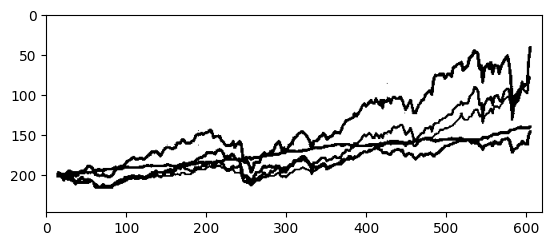

In [4]:
hh, ww = img.shape[:2]
maxColor = np.array(maxColor)

# threshold on white - can be adjusted
# Define lower and uppper limits
lower = maxColor-55
upper = maxColor

print(upper)
print(lower)

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# if some of the line is not captured, adjust the kernel size in the tuple
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))  
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
mask = 255-morph
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(thresh,cmap='gray')


Step 3 - Go through each pixel and for each color, plot points for each colored line

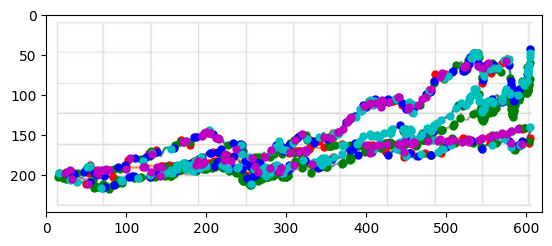

In [5]:
viableCount = 0 # counter to switch between each color for plotting
listOfColors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']

graphPoints = [] # list of points for each color
image = plt.imread(documentName)
for color in colors:

    # cycle each color
    ndColor = np.array(color)
    linePoints = []

    # traverse through all pixels
    for row in range(0,len(img),1):
        for col in range(0,len(img[row]),1):
            if thresh[row][col] == 0:

                # if pixel is not background
                if np.any(img[row][col] == ndColor):

                    # check if color is in the list of colors for non backround color 
                    plt.plot(col, row, color=listOfColors[viableCount], marker="o", markersize=5)
                    linePoints.append((col, row))
                    
    graphPoints.append(linePoints)
    viableCount += 1

plt.imshow(image)
plt.show()
